# Домашняя работа

В этой работы мы будем учиться предсказывать зарплату data scientist-ов в зависимочти от ряда факторов с помощью градиентоного бустинга

Цель домашней работы научиться предсказывать зарплаты (salary_in_usd) по ряды факторов

work_year: The number of years of work experience in the field of data science.

experience_level: The level of experience, such as Junior, Senior, or Lead.

employment_type: The type of employment, such as Full-time or Contract.

job_title: The specific job title or role, such as Data Analyst or Data Scientist.

salary: The salary amount for the given job.

salary_currency: The currency in which the salary is denoted.

salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

employee_residence: The country or region where the employee resides.

remote_ratio: The percentage of remote work offered in the job.

company_location: The location of the company or organization.

company_size: The company’s size is categorized as Small, Medium, or Large.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("ds_salaries.csv")
df_init = df.copy()

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Задание 1 (0.5 балла)

Разделите выборку на train, val, test (80%, 10%, 10%) в качестве таргета выберите salary_in_usd, удалите из признаков (salary) чтобы избежать лика в данных.

In [5]:
df = df.drop(['salary'], axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


In [6]:
X = df.drop(['salary_in_usd'], axis=1)
y = df['salary_in_usd']

In [ ]:
X.isnull().sum()#нет пропусков

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_currency     607 non-null    object
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(2), object(7)
memory usage: 42.8+ KB


In [7]:
#до разбиения сделаем обработку данных для использования линейной регрессии
X_dum = pd.get_dummies(X, drop_first=True)
print(X_dum.shape)
X_dum.head()

(607, 180)


,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2020,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020,50,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2020,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,50,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.1, random_state=42)

X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)
# Размер тестовой выборки для валидации выбран равным 0.1111,
# чтобы получить соотношение 80:10:10 между обучающей, валидационной и тестовой выборками.
# Поскольку мы уже отложили 10% данных для тестовой выборки, остается 90% данных.
# Чтобы получить 10% от всех данных для валидационной выборки,
# нам нужно взять 1/9 (или примерно 0.1111) от оставшихся 90% данных.

## Задание 2 (0.5 балла)

Обучите модель линейной регресии и оцените её качество через mape и rmse

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

lr = LinearRegression().fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
print(f"Значение ошибки MAPE трэйна: {mean_absolute_percentage_error(y_train, pred_train)}")
print(f"Значение ошибки MAPE теста: {mean_absolute_percentage_error(y_test, pred_test)}")

print(f"Значение ошибки RMSE трейна: {mean_squared_error(y_train, pred_train, squared=False)}")
print(f"Значение ошибки RMSE теста: {mean_squared_error(y_test, pred_test, squared=False)}")

Значение ошибки MAPE трэйна: 0.31415869576674676
Значение ошибки MAPE теста: 1.7449798020369571
Значение ошибки RMSE трейна: 39085.69204493538
Значение ошибки RMSE теста: 56616.7918403519


In [13]:
#попробуем с подбором гиперпараметров
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_train, y_train_train)
    y_pred = ridge.predict(X_train_val)
    rmse = np.sqrt(mean_squared_error(y_train_val, y_pred))
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print(f'Best alpha: {best_alpha}')

Best alpha: 10


In [14]:
#обучим с полученным коэффициентом регуляризации и посмотрим значение ошибок
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f"Значение ошибки MAPE теста: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Значение ошибки RMSE теста: {mean_squared_error(y_test, y_pred, squared=False)}")
#значение ошибки уменьшилось

Значение ошибки MAPE теста: 0.8582339902398695
Значение ошибки RMSE теста: 32964.70805291468


## Задание 3 (0.5 балла)

Обучите модель бустинга выберите любую из трех библиотек catboost, xgboost, lightgbm и оцените её качество через mape и rmse

In [16]:
import xgboost as xgb

reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1,
    max_depth=7,
    gamma=0,
)

In [17]:
reg_mod.fit(X_train,y_train)
pred_test = reg_mod.predict(X_test)

In [18]:
print(f"Значение ошибки MAPE теста: {mean_absolute_percentage_error(y_test, pred_test)}")

print(f"Значение ошибки RMSE теста: {mean_squared_error(y_test, pred_test, squared=False)}")

Значение ошибки MAPE теста: 0.6821621554426034
Значение ошибки RMSE теста: 32457.234485105342


In [ ]:
#перебираем гиперпараметры
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.05, 0.08, 0.1],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 1],
    'max_depth': [5, 7, 9],
    'gamma': [0, 1]
}

best_params = None
best_rmse = float('inf')

for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                for max_depth in param_grid['max_depth']:
                    for gamma in param_grid['gamma']:
                        params = {
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            'subsample': subsample,
                            'colsample_bytree': colsample_bytree,
                            'max_depth': max_depth,
                            'gamma': gamma
                        }
                        xgb_model = xgb.XGBRegressor(**params)
                        xgb_model.fit(X_train_train, y_train_train)
                        y_pred = xgb_model.predict(X_train_val)
                        rmse = np.sqrt(mean_squared_error(y_train_val, y_pred))
                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_params = params

print(f'Best params: {best_params}')


In [ ]:
reg_mod = xgb.XGBRegressor(best_params)
reg_mod.fit(X_train,y_train)
pred_test = reg_mod.predict(X_test)
print(f"Значение ошибки MAPE теста: {mean_absolute_percentage_error(y_test, pred_test)}")
print(f"Значение ошибки RMSE теста: {mean_squared_error(y_test, pred_test, squared=False)}")
#оставлю, чтобы потом попробовать дождаться и посмотреть ответ

In [ ]:
#так как полный перебор занимает очень много времени, то решила прервать выполнение предыдущей ячейки и
#выполнить подбор с помощью RandomSearch
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint

param_distributions = {
    'n_estimators': randint(500, 1500),
    'learning_rate': uniform(0.05, 0.1),
    'subsample': uniform(0, 1),
    'colsample_bytree': uniform(0, 1),
    'max_depth': randint(5, 10),
    'gamma': randint(0, 2)
}

xgb_model = xgb.XGBRegressor()
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=[(slice(None), slice(None))],
    return_train_score=True
)
random_search.fit(X_train_val, y_train_val)

best_params = random_search.best_params_
print(f'Best params: {best_params}')


In [26]:
reg_mod = xgb.XGBRegressor(**best_params)
reg_mod.fit(X_train,y_train)
pred_test = reg_mod.predict(X_test)
print(f"Значение ошибки MAPE теста: {mean_absolute_percentage_error(y_test, pred_test)}")
print(f"Значение ошибки RMSE теста: {mean_squared_error(y_test, pred_test, squared=False)}")

Значение ошибки MAPE теста: 0.5170531911522713
Значение ошибки RMSE теста: 30599.122847551964


## Задание 4 (0.5 балла)

Далее предобработайте категориальные признаки с помощью onehot кодирования, labelencoder и счетчиков (mean target encoding) сравните качество моделей с помощью mape и rmse. Необходимо обучить две модели линейную и бустинг. Какие выводы можно сделать? Выберите лучшую из моделей и дальше будем работать с ней

In [53]:
#с помощ=щью one-hot кодирования уже были проверены значения  (для линейной регрессии и бустинга):
print("Onehot кодирование\n")
print("Линейная регрессия:")
print("Значение ошибки MAPE теста: 1.7449798020369571")
print("Значение ошибки RMSE теста: 56616.7918403519")
print("Бустинг:")
print("Значение ошибки MAPE теста: 0.6821621554426034")
print("Значение ошибки RMSE теста: 32457.234485105342")

from sklearn.preprocessing import LabelEncoder

X_lbl = (X.copy()).apply(LabelEncoder().fit_transform)

X_train_lbl, X_test_lbl, y_train_lbl, y_test_lbl = train_test_split(X_lbl, y, test_size=0.1, random_state=42)
ridge.fit(X_train_lbl, y_train_lbl)
pred_test = ridge.predict(X_test_lbl)

print("\nLabelEncoder с регуляризацией\n")#так как с регуляризацией ошибки получились меньше
print("Линейная регрессия:")
print(f"Значение ошибки MAPE: {mean_absolute_percentage_error(y_test_lbl, pred_test)}")
print(f"Значение ошибки RMSE: {mean_squared_error(y_test_lbl, pred_test, squared=False)}")

reg_mod.fit(X_train_lbl,y_train_lbl)
pred_test = reg_mod.predict(X_test_lbl)
print("Бустинг:")
print(f"Значение ошибки MAPE: {mean_absolute_percentage_error(y_test_lbl, pred_test)}")
print(f"Значение ошибки RMSE: {mean_squared_error(y_test_lbl, pred_test, squared=False)}")
mape_pred = mean_absolute_percentage_error(y_test_lbl, pred_test)
rmse_pred = mean_squared_error(y_test_lbl, pred_test, squared=False)

Onehot кодирование

Линейная регрессия:
Значение ошибки MAPE теста: 1.7449798020369571
Значение ошибки RMSE теста: 56616.7918403519
Бустинг:
Значение ошибки MAPE теста: 0.6821621554426034
Значение ошибки RMSE теста: 32457.234485105342

LabelEncoder с регуляризацией

Линейная регрессия:
Значение ошибки MAPE: 1.695120710651316
Значение ошибки RMSE: 46648.370698794555
Бустинг:
Значение ошибки MAPE: 0.6163613244816604
Значение ошибки RMSE: 29078.433281523343


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import TargetEncoder

enc_auto = TargetEncoder(smooth="auto")
X_trans = enc_auto.fit_transform(X, y)

X_train_te, X_test_te, y_train_te, y_test_te = train_test_split(X_trans, y, test_size=0.1, random_state=42)
lr = LinearRegression().fit(X_train_te, y_train_te)
pred_test = lr.predict(X_test_te)
print("\nLabelEncoder\n")
print("Линейная регрессия:")
print(f"Значение ошибки MAPE: {mean_absolute_percentage_error(y_test_te, pred_test)}")
print(f"Значение ошибки RMSE: {mean_squared_error(y_test_te, pred_test, squared=False)}")

reg_mod.fit(X_train_te,y_train_te)
pred_test = reg_mod.predict(X_test_te)
print("Бустинг:")
print(f"Значение ошибки MAPE: {mean_absolute_percentage_error(y_test_te, pred_test)}")
print(f"Значение ошибки RMSE: {mean_squared_error(y_test_te, pred_test, squared=False)}")

#у меня из библиотеки не загружается, но в теории должно работать

Так как из библиотеки не загружался третий метод - о  его работе ничего сказать не можем.
Если сравнить onehot и label, то второй показал себя немного лучше.
При сравнении моделей - в обеих случаях бустинг оказался лучше, поэтому продолжаем работу с ним.

## Задание 5 (0.5 балла)

Покажите, где ошибается ваша модель. Выведите топ 20 примеров с наибольшей ошибкой. Проанализируете их, постарайтесь выделить группы с причинами ошибок в моделе. Какие выводы можно сделать? Что стоит изменить в данных чтобы улучшить качество модели?

In [39]:
reg_mod.fit(X_train_lbl,y_train_lbl)
pred_test = reg_mod.predict(X_test_lbl)
errors = abs(pred_test - y_test_lbl)
top_errors = errors.sort_values(ascending=False)
top_error_indices = top_errors.index
top_error_examples = X.loc[top_error_indices]
top_error_examples.head(20)

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
184,2021,MI,FL,Machine Learning Scientist,USD,PK,50,PK,M
210,2021,MI,FT,Machine Learning Engineer,EUR,SI,50,SI,L
208,2021,MI,FL,Data Engineer,USD,IT,0,US,L
78,2021,MI,CT,ML Engineer,USD,US,100,US,L
420,2022,MI,FT,Machine Learning Scientist,USD,US,100,US,L
204,2021,MI,FT,Data Scientist,USD,US,100,US,L
573,2022,SE,FT,Data Analyst,USD,US,100,US,M
398,2022,SE,FT,Data Scientist,USD,US,100,US,L
363,2022,SE,FT,Data Analyst,USD,CA,100,CA,M
493,2022,SE,FT,Machine Learning Developer,CAD,CA,100,CA,M


In [40]:
top_error_examples.head(20).describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,20.000000,20,20,20,20,20,20.000000,20,20
unique,NaN,3,3,9,4,8,NaN,7,3
top,NaN,MI,FT,Data Analyst,USD,US,NaN,US,M
freq,NaN,10,17,5,15,11,NaN,12,10
mean,2021.450000,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,NaN
std,0.686333,NaN,NaN,NaN,NaN,NaN,38.044296,NaN,NaN
min,2020.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN


<Axes: >

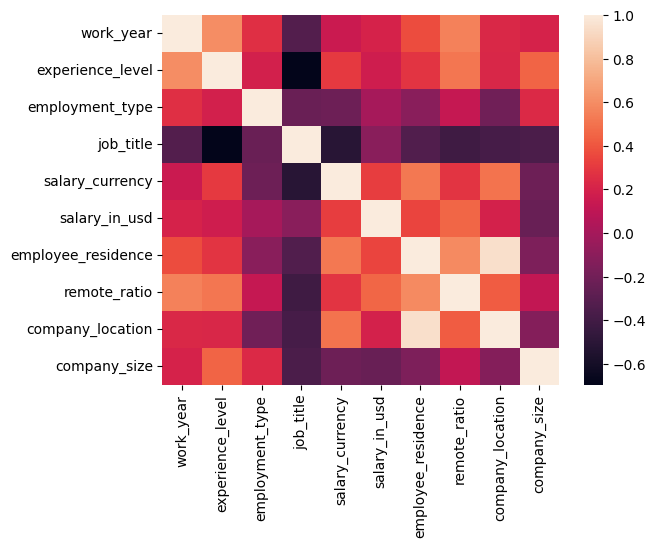

In [33]:
import seaborn as sns
top_error_examples = (df.copy()).apply(LabelEncoder().fit_transform).loc[top_error_indices]
corr = top_error_examples.head(20).corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Возможно, стоит попробовать убрать столбцы с сильной линейной зависимостью

In [38]:
top_error_examples.head(20).describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,20.000000,20.00000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000
mean,1.450000,2.35000,1.800000,25.35000,13.600000,188.70000,40.200000,1.500000,36.95000,0.600000
std,0.686333,0.74516,0.523148,12.24863,4.417668,100.65998,19.991051,0.760886,17.12024,0.598243
min,0.000000,0.00000,0.000000,12.00000,2.000000,12.00000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,2.00000,2.000000,15.75000,14.000000,127.25000,20.000000,1.000000,27.75000,0.000000
50%,2.000000,2.00000,2.000000,22.00000,16.000000,186.50000,55.000000,2.000000,48.00000,1.000000
75%,2.000000,3.00000,2.000000,37.25000,16.000000,243.75000,55.000000,2.000000,48.00000,1.000000
max,2.000000,3.00000,2.000000,48.00000,16.000000,358.00000,55.000000,2.000000,48.00000,2.000000


In [ ]:
bests = abs(pred_test - y_test_lbl)
top = bests.sort_values()
top_indices = top.index
top_examples = X.loc[top_indices]
top_examples.head(5)
#сравним с 5 лучшими

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
563,2022,SE,FT,Data Engineer,USD,US,100,US,M
540,2022,SE,FT,Data Analyst,USD,US,100,US,M
81,2021,MI,FT,Data Engineer,USD,US,100,US,L
493,2022,SE,FT,Machine Learning Developer,CAD,CA,100,CA,M
332,2022,SE,FT,Data Analyst,USD,US,100,US,M


In [ ]:
top_examples.head(20).describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,20.000000,20,20,20,20,20,20.000000,20,20
unique,NaN,3,1,10,5,9,NaN,9,3
top,NaN,SE,FT,Data Engineer,USD,US,NaN,US,M
freq,NaN,10,20,9,9,9,NaN,10,13
mean,2021.400000,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,NaN
std,0.680557,NaN,NaN,NaN,NaN,NaN,34.027852,NaN,NaN
min,2020.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
50%,2021.500000,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN


<Axes: >

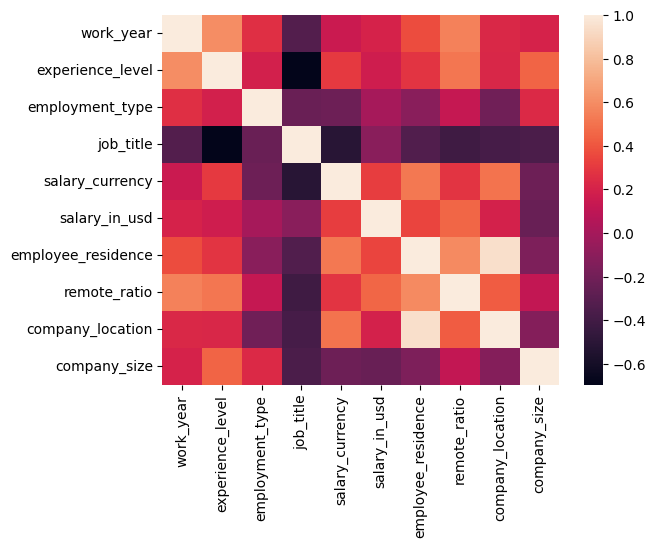

In [34]:
import seaborn as sns
top_examples = (df.copy()).apply(LabelEncoder().fit_transform).loc[top_error_indices]
corr = top_examples.head(20).corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [41]:
top_examples.head(20).describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,20.000000,20.00000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000
mean,1.450000,2.35000,1.800000,25.35000,13.600000,188.70000,40.200000,1.500000,36.95000,0.600000
std,0.686333,0.74516,0.523148,12.24863,4.417668,100.65998,19.991051,0.760886,17.12024,0.598243
min,0.000000,0.00000,0.000000,12.00000,2.000000,12.00000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,2.00000,2.000000,15.75000,14.000000,127.25000,20.000000,1.000000,27.75000,0.000000
50%,2.000000,2.00000,2.000000,22.00000,16.000000,186.50000,55.000000,2.000000,48.00000,1.000000
75%,2.000000,3.00000,2.000000,37.25000,16.000000,243.75000,55.000000,2.000000,48.00000,1.000000
max,2.000000,3.00000,2.000000,48.00000,16.000000,358.00000,55.000000,2.000000,48.00000,2.000000


In [ ]:
df.columns

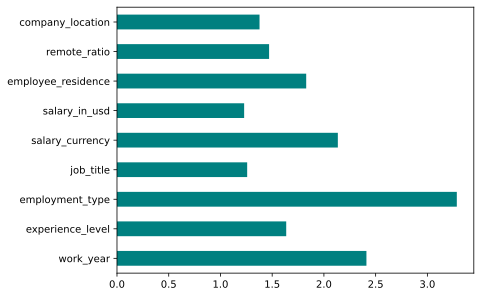

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(X_train_lbl, y_train_lbl)
feature_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feature_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

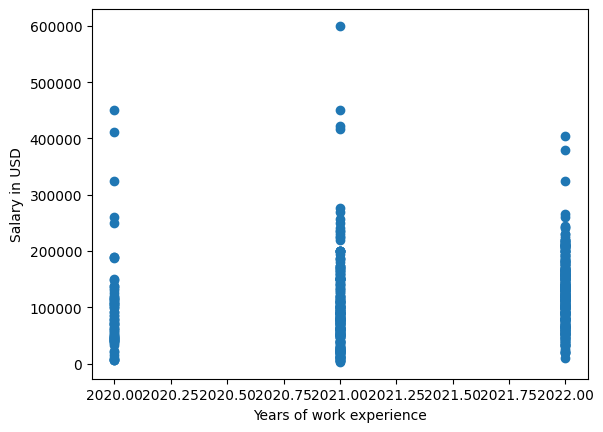

In [43]:
import matplotlib.pyplot as plt
plt.scatter(df['work_year'], df['salary_in_usd'])
plt.xlabel('Years of work experience')
plt.ylabel('Salary in USD')
plt.show()

1. Можно отбросить менее важные признаки, оставив 5 лучших
2. Можно перед отбрасыванием зарплаты поделить его значение на количество лет работы, чтобы учесть опыт работы и удалить признак года
3. превратить remote_ratio в бинарный признак

## Задание 6 (0.5 балла)

Придумайте признаки для улучшения качества модели на основе предыдущего пункта. Как вам кажется какими признаками можно улучшить качетсво модели? Реализуйте признаки и проверьте улучшилось ли качество модели. Полный бал за задание ставится даже при отсутствии улучшения качества модели, важно попробовать проверить свои гипотезы и сделать выводы

In [54]:
df_new = df_init.copy()
df_new['salary_per_year'] = df_new['salary'] / df_new['work_year']
df_new['is_remote']= (df_new['remote_ratio'] == 100).astype(int)
df_new = df_new.drop(['Unnamed: 0','salary','work_year','job_title', 'remote_ratio','company_location'], axis = 1)
X_lbl = (df_new.drop('salary_in_usd',axis = 1).copy()).apply(LabelEncoder().fit_transform)
X_train_lbl, X_test_lbl, y_train_lbl, y_test_lbl = train_test_split(X_lbl, y, test_size=0.1, random_state=42)
reg_mod.fit(X_train_lbl,y_train_lbl)
pred_test = reg_mod.predict(X_test_lbl)
print(f"Значение предыдущей ошибки MAPE: {mape_pred}")
print(f"Значение предыдущей ошибки RMSE: {rmse_pred}")
print(f"Значение ошибки MAPE: {mean_absolute_percentage_error(y_test_lbl, pred_test)}")
print(f"Значение ошибки RMSE: {mean_squared_error(y_test_lbl, pred_test, squared=False)}")

Значение предыдущей ошибки MAPE: 0.6163613244816604
Значение предыдущей ошибки RMSE: 29078.433281523343
Значение ошибки MAPE: 0.22299035843321374
Значение ошибки RMSE: 6034.352030330927


Видны значительные улучшения

## Задание 7 (0.5 балла)

Теперь используете исключительно catboost. Обучить модель. Подберите оптимальные гиперпараметры. Используйте pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметры cat_features. Оцените качество итоговой модели, скорость обучения и скорость предсказания

In [56]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111)

# Создание объектов Pool с указанием категориальных признаков
cat_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
train_pool = Pool(X_train, y_train, cat_features=cat_features)
val_pool = Pool(X_val, y_val, cat_features=cat_features)

# Создание и обучение модели CatBoost с подбором гиперпараметров
model = CatBoostRegressor(iterations=1000)
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3, 5]}
model.grid_search(grid, train_pool, plot=True, verbose=False)

# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
527:	learn: 18177.6434048	test: 61453.9933667	best: 61293.7644171 (397)	total: 2.15s	remaining: 1.93s
528:	learn: 18161.0609828	test: 61448.2979122	best: 61293.7644171 (397)	total: 2.16s	remaining: 1.92s
529:	learn: 18152.9558661	test: 61448.5046346	best: 61293.7644171 (397)	total: 2.16s	remaining: 1.92s
530:	learn: 18111.5192102	test: 61493.4971515	best: 61293.7644171 (397)	total: 2.17s	remaining: 1.91s
531:	learn: 18108.4147249	test: 61497.5299009	best: 61293.7644171 (397)	total: 2.17s	remaining: 1.91s
532:	learn: 18091.8930881	test: 61539.6431749	best: 61293.7644171 (397)	total: 2.17s	remaining: 1.9s
533:	learn: 18067.8823336	test: 61499.6110190	best: 61293.7644171 (397)	total: 2.18s	remaining: 1.9s
534:	learn: 18065.3984595	test: 61502.5934299	best: 61293.7644171 (397)	total: 2.18s	remaining: 1.9s
535:	learn: 18051.5427835	test: 61540.8212474	best: 61293.7644171 (397)	total: 2.18s	remaining: 1.89s
536:	learn: 18035

In [58]:
print(f"Значение ошибки MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Значение ошибки RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")

Значение ошибки MAPE: 0.34271151902984937
Значение ошибки RMSE: 47280.772379554604


## Задание 8 (0.5 балла)

Теперь используете исключительно xgboost. Обучить модель. Подберите оптимальные гиперпараметры. Закодируйте категориальные переменные, как хотите. Оцените качество итоговой модели, скорость обучения и скорость предсказания.

In [60]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint

param_distributions = {
    'n_estimators': randint(500, 1500),
    'learning_rate': uniform(0.05, 0.1),
    'subsample': uniform(0, 1),
    'colsample_bytree': uniform(0, 1),
    'max_depth': randint(5, 10),
    'gamma': randint(0, 2)
}

xgb_model = xgb.XGBRegressor()
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=[(slice(None), slice(None))],
    return_train_score=True
)
# используем label_encoding, который дал наилучший результат и датафрейм, полученный в т6 задании
#так как делили только на трэин и тест, то делим еще раз с валидационной
X_train_val, X_test, y_train_val, y_test = train_test_split(X_lbl, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111)

random_search.fit(X_val, y_val)

best_params = random_search.best_params_
print(f'Best params: {best_params}')
reg_mod = xgb.XGBRegressor(**best_params)
reg_mod.fit(X_train_val,y_train_val)
pred_test = reg_mod.predict(X_test)
print(f"Значение ошибки MAPE теста: {mean_absolute_percentage_error(y_test, pred_test)}")
print(f"Значение ошибки RMSE теста: {mean_squared_error(y_test, pred_test, squared=False)}")

Best params: {'colsample_bytree': 0.9930629766180834, 'gamma': 0, 'learning_rate': 0.13300885064765844, 'max_depth': 6, 'n_estimators': 1458, 'subsample': 0.5133356221853022}
Значение ошибки MAPE теста: 0.29037908996399536
Значение ошибки RMSE теста: 18007.712341357652


## Задание 9 (0.5 балла)

Теперь используете исключительно lightgbm. Обучить модель. Подберите оптимальные гиперпараметры. Закодируйте категориальные переменные, как хотите. Оцените качество итоговой модели, скорость обучения и скорость предсказания.

In [69]:
#будем пользоваться трейном, тестом и валидационной выборкой из прошлого задания
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Создание и обучение модели LightGBM с подбором гиперпараметров
model = LGBMRegressor()
param_distributions = {
    'num_leaves': sp_randint(31, 128),
    'reg_alpha': sp_uniform(0.1, 0.5),
    'min_data_in_leaf': sp_randint(30, 101),
    'lambda_l1': sp_uniform(0, 1),
    'lambda_l2': sp_uniform(0, 1)
}
random_search = RandomizedSearchCV(model,
                                   param_distributions=param_distributions,
                                   n_iter=10,
                                   cv=5)
random_search.fit(X_val, y_val)

best_params = random_search.best_params_
print(f'Best params: {best_params}')

[LightGBM] [Warning] lambda_l1 is set=0.16085292965110776, reg_alpha=0.2435550471275523 will be ignored. Current value: lambda_l1=0.16085292965110776
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] lambda_l2 is set=0.9125254605018291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9125254605018291
[LightGBM] [Warning] lambda_l1 is set=0.16085292965110776, reg_alpha=0.2435550471275523 will be ignored. Current value: lambda_l1=0.16085292965110776
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] lambda_l2 is set=0.9125254605018291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9125254605018291
[LightGBM] [Warning] lambda_l1 is set=0.16085292965110776, reg_alpha=0.2435550471275523 will be ignored. Current value: lambda_l1=0.16085292965110776
[LightGBM] [Warning] min_data_in_leaf 

In [72]:
model = LGBMRegressor(**best_params)
model.fit(X_train_val, y_train_val)
y_pred = model.predict(X_test)
print(f"Значение ошибки MAPE теста: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Значение ошибки RMSE теста: {mean_squared_error(y_test, y_pred, squared=False)}")

[LightGBM] [Warning] lambda_l1 is set=0.16085292965110776, reg_alpha=0.2435550471275523 will be ignored. Current value: lambda_l1=0.16085292965110776
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] lambda_l2 is set=0.9125254605018291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9125254605018291
Значение ошибки MAPE теста: 0.44036983192060336
Значение ошибки RMSE теста: 19151.365874976258


## Задание 10 (0.5 балла)

Сделайте выводы про модели бустинга, какая из моделей показала лучший результат по качеству, скорости обучения и скорости предсказания

Худшей моделью и по скорости, и по времени обучения была модель catboost, со значениями ошибки:

MAPE: 0.34271151902984937

RMSE: 47280.772379554604



Обе оставшиеся модели сработали быстро(скорее всего, из-за рандомного выбора гиперпарамтеров), при этом получили хорошие результаты.

У модели xgboost:

MAPE: 0.29037908996399536

RMSE: 18007.712341357652

У модели lightgbm:

MAPE: 0.44036983192060336

RMSE: 19151.365874976258

Лучший результат показала модель xgboost.